# Predicting Catalog Demand

You recently started working for a company that manufactures and sells high-end home goods. Last year the company sent out its first print catalog, and is preparing to send out this year's catalog in the coming months. The company has 250 new customers from their mailing list that they want to send the catalog to. <br>
Your manager has been asked to determine how much profit the company can expect from sending a catalog to these customers. You, the business analyst, are assigned to help your manager run the numbers. While fairly knowledgeable about data analysis, your manager is not very familiar with predictive models. <br>
You’ve been asked to predict the expected profit from these 250 new customers. Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds $10,000. <br>

## Step 1: Business and Data Understanding

Key Decisions:
1. The company needs to decide whether to print and send the catalog to the 250 new customers in the mailing list. This decision to do so will be made only if the expected profits exceed $10,000.
2. In order to inform the decision, we need data on previous sales with the same variables as in the current mailing list. We also need to know what are the costs to print the catalog and the average gross margin. The information from the previous year catalog sale would be also useful to estimate the chances of actually buying from the catalog.

## Step 2: Data Exploration

In [1]:
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_excel('p1-customers.xlsx')
sales.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [3]:
sales.describe()

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,1647.845474,80123.333474,399.774093,104.297684,3.347368,4.500632
std,962.728105,107.255770,340.115808,2.837240,2.738568,2.309986
min,2.000000,80002.000000,1.220000,100.000000,1.000000,1.000000
25%,820.500000,80014.000000,168.925000,101.000000,1.000000,2.000000
50%,1629.000000,80123.000000,281.320000,105.000000,3.000000,5.000000
75%,2492.500000,80221.000000,572.400000,107.000000,5.000000,6.000000
max,3335.000000,80640.000000,2963.490000,109.000000,26.000000,8.000000


In [4]:
sales['Customer_Segment'].unique()

array(['Store Mailing List', 'Loyalty Club and Credit Card',
       'Loyalty Club Only', 'Credit Card Only'], dtype=object)

In [5]:
sales['State'].unique()

array(['CO'], dtype=object)

The following variables seem to have no logical connection to our predictor variable 'Avg_Sale_Amount' and will be excluded from the analysis:

In [6]:
features = sales.drop(columns=['Name', 'Customer_ID', 'Address', 'State', 'ZIP', 'City', 'Store_Number'])
features.head()

,Customer_Segment,Avg_Sale_Amount,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Store Mailing List,227.90,No,1,6
1,Store Mailing List,55.00,Yes,1,6
2,Store Mailing List,212.57,No,1,3
3,Store Mailing List,195.31,Yes,1,6
4,Store Mailing List,110.55,Yes,1,2


### Splitting target variable and features

In [7]:
features = features.drop(columns=['Avg_Sale_Amount']) 
features.head(1)

,Customer_Segment,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Store Mailing List,No,1,6


In [8]:
outcome = sales['Avg_Sale_Amount']
outcome.head()

0    227.90
1     55.00
2    212.57
3    195.31
4    110.55
Name: Avg_Sale_Amount, dtype: float64

### Checking linear relationship

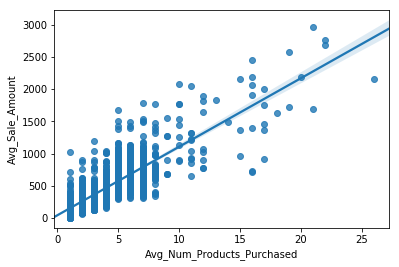

In [9]:
sns.regplot(features['Avg_Num_Products_Purchased'], outcome);

**Interpretation**:  Since the sales amount tend to increase together with the increase of the number of products purchased, there is a linear relationship between the two variables.

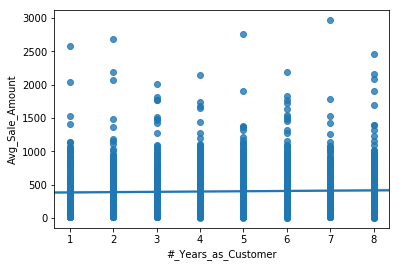

In [10]:
sns.regplot(features['#_Years_as_Customer'], outcome);

**Interpretation**: 'Years as Customer' variable seems to have no relationship with our target variable "Avg_Sale_Amount". That is why it will be excluded from the analysis.

In [11]:
features = features.drop(columns='#_Years_as_Customer')
features.head(2)

,Customer_Segment,Responded_to_Last_Catalog,Avg_Num_Products_Purchased
0,Store Mailing List,No,1
1,Store Mailing List,Yes,1


### One-hot encoding

Since we have several categorical variables, we need to do one-hot encoding:

In [12]:
features = pd.get_dummies(features)

In [13]:
features.head(2)

,Avg_Num_Products_Purchased,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,Responded_to_Last_Catalog_No,Responded_to_Last_Catalog_Yes
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,1


In [14]:
features = features.drop(columns='Responded_to_Last_Catalog_No')
features.head(2)

,Avg_Num_Products_Purchased,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,Responded_to_Last_Catalog_Yes
0,1,0,0,0,1,0
1,1,0,0,0,1,1


In [15]:
features.shape

(2375, 6)

## Step 3: Linear Regression

In [16]:
# checking for correlations between  predictor variables to avoid multicollinearity
corr = features.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Avg_Num_Products_Purchased,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,Responded_to_Last_Catalog_Yes
Avg_Num_Products_Purchased,1,0.43,0.056,0.43,-0.64,-0.18
Customer_Segment_Credit Card Only,0.43,1,-0.29,-0.15,-0.48,-0.1
Customer_Segment_Loyalty Club Only,0.056,-0.29,1,-0.17,-0.53,-0.14
Customer_Segment_Loyalty Club and Credit Card,0.43,-0.15,-0.17,1,-0.28,-0.077
Customer_Segment_Store Mailing List,-0.64,-0.48,-0.53,-0.28,1,0.25
Responded_to_Last_Catalog_Yes,-0.18,-0.1,-0.14,-0.077,0.25,1


In [17]:
features['intercept'] = 1
lm = sm.OLS(outcome, features)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     2438.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:23:03   Log-Likelihood:                -15058.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2369   BIC:                         3.016e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Avg_Num_Products_Purchased                       66.8057      1.515     44.099      0.000      63.835      69.776
Customer_Segment_Credit Card Only                83.2195      6.319     13.170      0.000      70.828      95.611
Customer_Segment_Loyalty Club Only              -66.8120      5.199    -12.851      0.000     -77.007     -56.617
Customer_Segment_Loyalty Club and Credit Card   364.9123      9.842     37.077      0.000     345.612     384.212
Customer_Segment_Store Mailing List            -159.5400      5.392    -29.588      0.000    -170.113    -148.966
Responded_to_Last_Catalog_Yes                   -28.1735     11.259     -2.502      0.012     -50.253      -6.094
intercept                                       221.7798      6.139     36.126      0.000     209.741     233.818
==============================================================================
Omnibus:                      363.115   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4839.622
Skew:                           0.242   Prob(JB):                         0.00
Kurtosis:                       9.976   Cond. No.                     4.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation**: According to the results, the R-squared value is 0.837, indicating that it is a good model (>0.5) and the chosen predictors have high explanatory power. <br>
The used predictors are both highly statistically significant, meaning that it is highly probable that the relationship between the target variable and the predictors actually exists.

### Testing another model without Responded_to_Last_Catalog_Yes variable

In [18]:
feat = features.drop(columns='Responded_to_Last_Catalog_Yes')
feat['intercept'] = 1
lm2 = sm.OLS(outcome, feat)
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:23:03   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Avg_Num_Products_Purchased                       66.9762      1.515     44.208      0.000      64.005      69.947
Customer_Segment_Credit Card Only                83.2796      6.326     13.165      0.000      70.875      95.685
Customer_Segment_Loyalty Club Only              -66.0761      5.196    -12.716      0.000     -76.266     -55.886
Customer_Segment_Loyalty Club and Credit Card   365.1184      9.853     37.058      0.000     345.798     384.439
Customer_Segment_Store Mailing List            -162.1381      5.297    -30.610      0.000    -172.525    -151.751
intercept                                       220.1838      6.113     36.022      0.000     208.197     232.170
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                     4.79e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Step 4: Predicting Sales from Catalog Launch

Before scoring, we need to prepare the dataset with completing the same data transformations as with the training set.

In [19]:
df_pred = pd.read_excel('p1-mailinglist.xlsx')
df_pred.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [20]:
features_pred = df_pred.drop(columns=['Name', 'Customer_ID', 'Address', 'State', 'ZIP', 'City', 'Store_Number', '#_Years_as_Customer'])
features_pred.head()

,Customer_Segment,Avg_Num_Products_Purchased,Score_No,Score_Yes
0,Loyalty Club Only,3,0.694964,0.305036
1,Loyalty Club and Credit Card,6,0.527275,0.472725
2,Loyalty Club Only,7,0.421118,0.578882
3,Loyalty Club Only,2,0.694862,0.305138
4,Loyalty Club Only,4,0.612294,0.387706


In [21]:
features_pred['Responded_to_Last_Catalog_Yes'] = df_pred['Score_Yes'].apply(lambda x: 1 if x>=0.5 else 0)
features_pred['Responded_to_Last_Catalog_Yes'].head(5)

0    0
1    0
2    1
3    0
4    0
Name: Responded_to_Last_Catalog_Yes, dtype: int64

In [22]:
features_pred.head()

,Customer_Segment,Avg_Num_Products_Purchased,Score_No,Score_Yes,Responded_to_Last_Catalog_Yes
0,Loyalty Club Only,3,0.694964,0.305036,0
1,Loyalty Club and Credit Card,6,0.527275,0.472725,0
2,Loyalty Club Only,7,0.421118,0.578882,1
3,Loyalty Club Only,2,0.694862,0.305138,0
4,Loyalty Club Only,4,0.612294,0.387706,0


In [23]:
features_pred = features_pred.drop(columns=['Score_No', 'Score_Yes'])
features_pred.head()

,Customer_Segment,Avg_Num_Products_Purchased,Responded_to_Last_Catalog_Yes
0,Loyalty Club Only,3,0
1,Loyalty Club and Credit Card,6,0
2,Loyalty Club Only,7,1
3,Loyalty Club Only,2,0
4,Loyalty Club Only,4,0


### One-hot encoding

In [24]:
features_pred = pd.get_dummies(features_pred)
features_pred.head(3)

,Avg_Num_Products_Purchased,Responded_to_Last_Catalog_Yes,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,3,0,0,1,0,0
1,6,0,0,0,1,0
2,7,1,0,1,0,0


## Predicting Sales

In [27]:
features_pred['intercept'] = 1
sales_pred = results.predict(features_pred)
sales_pred.sum()

171048.751482583

In [29]:
# sales according to the second model without Responded_to_Last_Catalog_Yes variable
features_pred = features_pred.drop(columns='Responded_to_Last_Catalog_Yes')
sales_pred2 = results2.predict(features_pred)
sales_pred2.sum()

138292.13010078424

## Step 5: Calculating Profit

Here we calculate profit based on two models specified above. I formulate this as conservative and optimistic scenarios. The difference between the two is that we assume that all clients would respond to a catalog launch as expected, which is however less likely.

### Conservative Scenario:

First, the sales that we predicted using the linear regression model need to be multiplied by the probability that the customer buys the catalog.


In [32]:
sales_conservative = sales_pred2*df_pred['Score_Yes']
sales_conservative.head(5)

0    108.298804
1    466.654501
2    360.609345
3     87.898046
4    163.616744
dtype: float64

Second, the expected revenues need now to be summed up and multiplied by the gross margin specified at 50%. Third, the expected profits were calculated by subtracting the cost to print the catalog for the 250 customers.

In [33]:
profit_conservative = sales_conservative.sum()*0.5-(6.5*250)
profit_conservative

21987.435686545337

### Optimistic Scenario:

In [35]:
sales_optimistic = sales_pred*df_pred['Score_Yes']
profit_optimistic = sales_optimistic.sum()*0.5-(6.5*250)
profit_optimistic

28143.593450941524

## Conclusion:

The expected profit from sending the catalog to the 250 customers is at least 22,000 USD (in optimistic scenario 28,000 USD), which is twice higher than the sum specified by managers in order to make this decision (10,000 USD). Hence, the chances to make good profits are high even if the sales turn out to be worse than prognosed by the analysis.